In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('movies.dat', sep='::', engine='python', encoding='latin-1')
df1.columns = ['MovieIDs', 'MovieName', 'Category']
df1.dropna(inplace=True)
df1

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [3]:
df1.shape

(3882, 3)

In [4]:
df1.isnull().sum()

MovieIDs     0
MovieName    0
Category     0
dtype: int64

In [5]:
df1.describe()

,MovieIDs
count,3882.000000
mean,1986.560793
std,1146.483260
min,2.000000
25%,983.250000
50%,2010.500000
75%,2980.750000
max,3952.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MovieIDs   3882 non-null   int64 
 1   MovieName  3882 non-null   object
 2   Category   3882 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
df2 = pd.read_csv("ratings.dat",sep='::', engine='python',encoding='latin-1')
df2.columns =['ID','MovieID','Ratings','TimeStamp']
df2.dropna(inplace=True)
df2

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
...,...,...,...,...
1000203,6040,1091,1,956716541
1000204,6040,1094,5,956704887
1000205,6040,562,5,956704746
1000206,6040,1096,4,956715648


In [8]:
df2.isnull().sum()

ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [9]:
df3 = pd.read_csv("users.dat",sep='::',engine='python',encoding='latin-1')
df3.columns =['UserID','Gender','Age','Occupation','Zip-code']
df3.dropna(inplace=True)
df3

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


In [10]:
df3.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [11]:
df = pd.concat([df1, df2,df3], axis=1)
df


,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117
...,...,...,...,...,...,...,...,...,...,...,...,...
1000203,NaN,NaN,NaN,6040,1091,1,956716541,NaN,NaN,NaN,NaN,NaN
1000204,NaN,NaN,NaN,6040,1094,5,956704887,NaN,NaN,NaN,NaN,NaN
1000205,NaN,NaN,NaN,6040,562,5,956704746,NaN,NaN,NaN,NaN,NaN
1000206,NaN,NaN,NaN,6040,1096,4,956715648,NaN,NaN,NaN,NaN,NaN


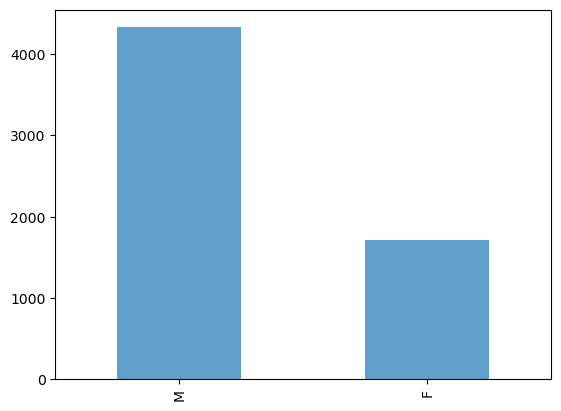

In [12]:

df['Gender'].value_counts().plot(kind='bar',alpha=0.7)
plt.show()

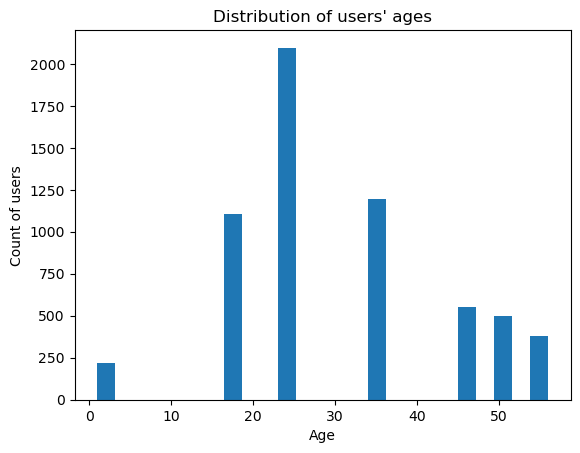

In [13]:
df3.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('Count of users')
plt.xlabel('Age')
plt.show()

In [14]:
category_counts = df1['Category'].value_counts()
top_10_categories = category_counts.head(10)
other_count = category_counts[10:].sum()
top_10_categories['Other'] = other_count


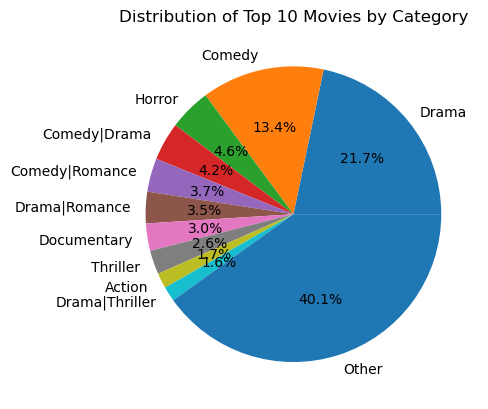

In [15]:
plt.pie(top_10_categories, labels=top_10_categories.index, autopct='%1.1f%%')
plt.title("Distribution of Top 10 Movies by Category")
plt.show()

In [16]:
category_counts = df['Category'].value_counts()
top_20_categories = category_counts.head(20)
df_top_20 = df[df['Category'].isin(top_20_categories.index)]

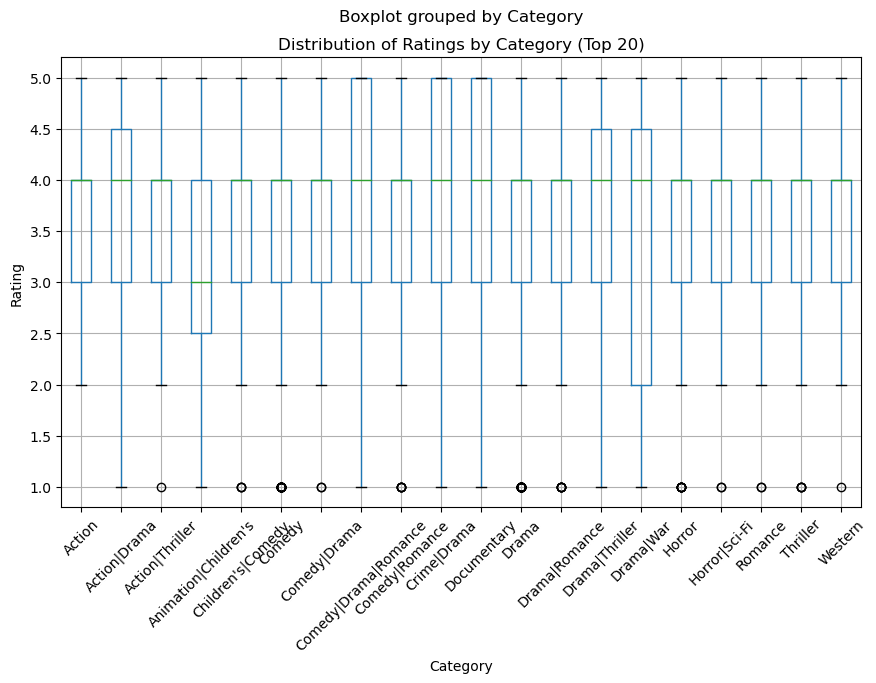

In [17]:
df_top_20.boxplot(column='Ratings', by='Category', figsize=(10, 6))
plt.title('Distribution of Ratings by Category (Top 20)')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


In [18]:
columns = ['Ratings', 'Age', 'Occupation']
df_subset = df[columns]

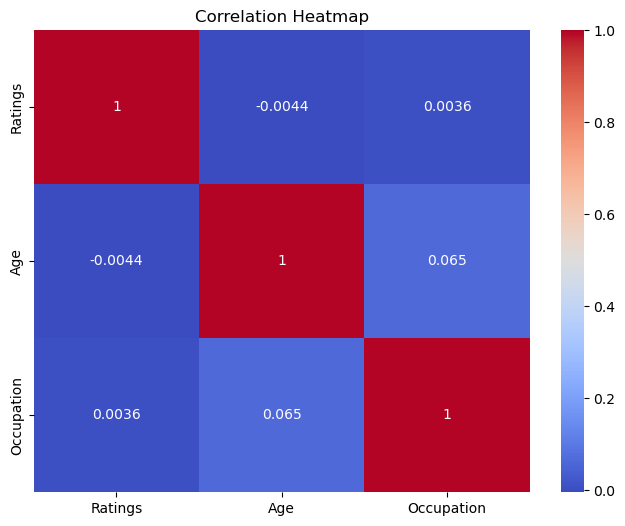

In [19]:
corr_matrix = df_subset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
first_500 = df[500:]
first_500.dropna(inplace=True)
features = first_500[['MovieID','Age','Occupation']].values
labels = first_500[['Ratings']].values


In [29]:
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
logreg = LogisticRegression()

In [32]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = logreg.predict(X_val)

In [34]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 34.86%


In [36]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [37]:
y_pred_dt = decision_tree.predict(X_val)

In [38]:
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt*100:.2f}%")
random_forest = RandomForestClassifier()

Decision Tree Accuracy: 29.69%


In [39]:
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_val)

In [40]:
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf*100:.2f}%")
svm_model = SVC()

Random Forest Accuracy: 28.36%


In [41]:
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)

In [42]:
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm*100:.2f}%")

SVM Accuracy: 34.86%
